In [84]:
import linsolve
import tf_linsolve
import scipy
import numpy as np
import pylab as plt
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [85]:
x = np.linspace(0, 2 * np.pi, 1000)
g = np.cos(x) + 1j * np.sin(x)
h = np.sin(x) + 1j * np.cos(x)
i = x + 1j * x
j = -x - 1j * x
k = np.cos(x) - 1j * x
data = {
    "g + h": g + h,
    "g + i": g + i,
    "i + h": i + h,
    "i + g + h": i + g + h,
    "k + j": k + j,
    "i + j": i + j,
}
wgts = {k: np.random.uniform(0.9, 1.1, v.shape[0]) for k, v in data.items()}

In [86]:
ls = linsolve.LinearSolver(data)
tfls = tf_linsolve.LinearSolver(data)

In [89]:
%time solution = ls.solve()

CPU times: user 1.31 ms, sys: 921 µs, total: 2.23 ms
Wall time: 1.42 ms


In [90]:
%time sol = tfls.solve()

CPU times: user 2.99 ms, sys: 1.31 ms, total: 4.3 ms
Wall time: 3.09 ms


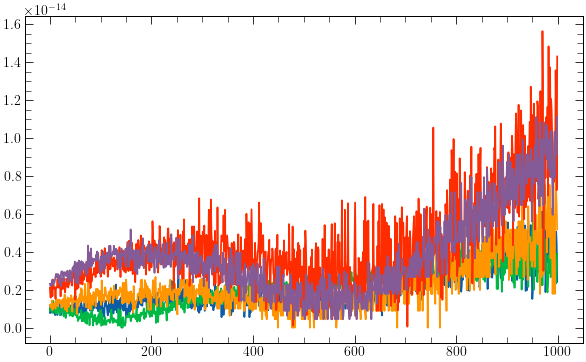

In [91]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Least-Squares Case

In [92]:
ls = linsolve.LinearSolver(data, wgts=wgts)
tfls = tf_linsolve.LinearSolver(data, wgts=wgts)

In [93]:
%time solution = ls.solve(mode='lsqr')

CPU times: user 45.2 ms, sys: 6.33 ms, total: 51.6 ms
Wall time: 46.7 ms


In [94]:
%time sol = tfls.solve(mode='lsqr', rcond=0)

CPU times: user 5.46 ms, sys: 1.88 ms, total: 7.34 ms
Wall time: 4.9 ms


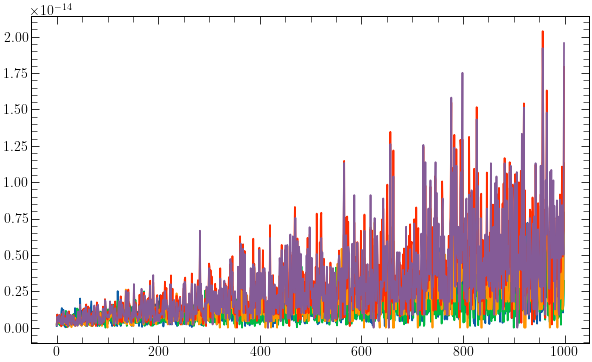

In [95]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Psuedo-inverse

In [96]:
%time solution = ls.solve()

CPU times: user 13.8 ms, sys: 2.1 ms, total: 15.9 ms
Wall time: 14.8 ms


In [97]:
%time sol = tfls.solve()

CPU times: user 30.3 ms, sys: 4.23 ms, total: 34.6 ms
Wall time: 11.7 ms


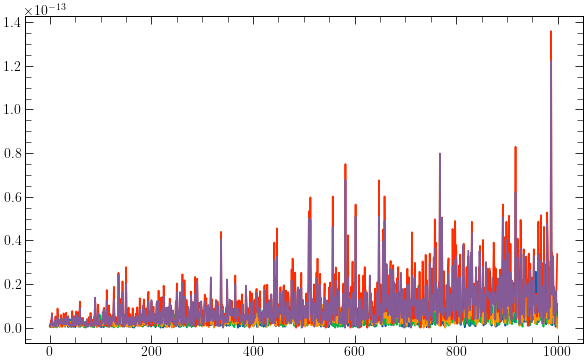

In [98]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()

### Solve

In [99]:
%time solution = ls.solve(mode='solve')

CPU times: user 8.73 ms, sys: 1.35 ms, total: 10.1 ms
Wall time: 9.19 ms


In [100]:
%time sol = tfls.solve(mode='solve')

CPU times: user 8.63 ms, sys: 3.01 ms, total: 11.6 ms
Wall time: 7.74 ms


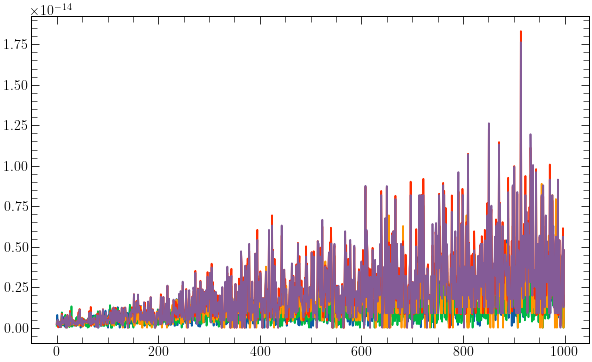

In [101]:
plt.figure(figsize=(10, 6))
for k in sol.keys():
    plt.plot(np.abs(sol[k] - solution[k]))
    
plt.show()